## Coursera IBM Capstone Project

This notebook is made solely for the purpose of the Coursera IBM Data science Capstone Project and it represents final delivery along with accompanying report and presentation. 
The purpose of the project is to demonstrate knowledge of data analysis and machine learning libraries in Python, as well as acquired related skills. 
This project tries to solve an imaginary, but very common problem on the Croatian real estate market. I hope it will help actors at both ends of real estate transactions, especially private traders, but also those who provide real estate services, such as real estate agencies. It includes querying Foursquare location data for the purpose of comparing city neighborhoods. 

### Importing required libraries

In [27]:
! pip install xlrd
! pip install lxml

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

print('Libraries imported.')

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Libraries imported.


### We will use geolocator variable throughout this notebook

In [28]:
geolocator = Nominatim(user_agent="foursquare_agent")

# 1. Getting the basic neighborhoods data

### Loading neighborhoods of Split from url=https://www.split.hr/DesktopModules/Bring2mind/DMX/API/Entries/Download?language=hr-HR&Command=Core_Download&EntryId=6080&PortalId=0

In [29]:
split_gk = pd.read_excel('https://www.split.hr/DesktopModules/Bring2mind/DMX/API/Entries/Download?language=hr-HR&Command=Core_Download&EntryId=6080&PortalId=0', header=1)
split_gk

R.BR. NAZIV MJESNOG ODBORA / GRADSKOG KOTARA / GRADSKE ČETVRTI  \
0       1                                         GK BAČVICE         
1       2                                  GK BLATINE ŠKRAPE         
2       3                                             GK BOL         
3       4                                            GK BRDA         
4       5                                            GK GRAD         
5       6                                           GK GRIPE         
6       7                                            GK KMAN         
7       8                                         GK KOCUNAR         
8       9                                           GK LOKVE         
9      10                                          GK LOVRET         
10     11                                     GK LUČAC MANUŠ         
11     12                                            GK MEJE         
12     13                                          GK MEJAŠI         
13     14                                        GK MERTOJAK         
14     15                                      GK NESLANOVAC         
15     16                                         GK PLOKITE         
16     17                                         GK PUJANKE         
17     18                                     GK RAVNE NJIVE         
18     19                                        GK SIROBUJA         
19     20                                          GK SPINUT         
20     21                                         GK SPLIT 3         
21     22                                         GK SUĆIDAR         
22     23                                            GK ŠINE         
23     24                                        GK TRSTENIK         
24     25                                           GK VAROŠ         
25     26                                         GK VISOKA          
26     27                                           GK ŽNJAN         
27     28                                     MO DONJE SITNO         
28     29                                    MO GORNJE SITNO         
29     30                                           MO KAMEN         
30     31                                         MO SLATINE         
31     32                                        MO SRINJINE         
32     33                                         MO STOBREČ         
33     34                                       MO ŽRNOVNICA         

                                 SJEDIŠTE   \
0                                  VIŠKA 7   
1                        POLJIČKA CESTA 31   
2                               SLOBODE 24   
3                             MOSTARSKA 17   
4                           BERNARDINOVA 1   
5                       MATICE HRVATSKE 16   
6                              ŠIBENSKA 27   
7                               MOSEĆKA 56   
8                            ŠIŽGORIĆEVA 5   
9                           GUNDULIĆEVA 11   
10                               OMIŠKA 14   
11                            NJEGOŠEVA 1A   
12                        JOSIPA JOVIĆA 51   
13                             DOVERSKA 17   
14                         SARAJEVSKA 30 D   
15                                ILOČKA 6   
16                        TIJARDOVIĆEVA 10   
17                         HERCEGOVAČKA 40   
18                            MANDIĆEVA 34   
19                             MATOŠEVA 29   
20                          GETALDIĆEVA 13   
21                        VUKOVARSKA 109/D   
22                              JOSIPOVA 2   
23                         PUT TRSTENIKA 1   
24                           SINOVČIĆEVA 6   
25                            CESTA MIRA 3   
26                               STONSKA 2   
27  HRVATSKIH \nDRAGOVOLJACA 48, ŽRNOVNICA   
28                          SVETOG ROKA 11   
29                         SV. MIHOVILA 52   
30                          DUBOKE GARME 2   
31                             MOSORSKA 33   
32                             IVAN

### Since we don't need other columns, let's get rid of them

In [30]:
split_gk = split_gk[['NAZIV MJESNOG ODBORA / GRADSKOG KOTARA / GRADSKE ČETVRTI']].copy()
split_gk

NAZIV MJESNOG ODBORA / GRADSKOG KOTARA / GRADSKE ČETVRTI
0                                          GK BAČVICE      
1                                   GK BLATINE ŠKRAPE      
2                                              GK BOL      
3                                             GK BRDA      
4                                             GK GRAD      
5                                            GK GRIPE      
6                                             GK KMAN      
7                                          GK KOCUNAR      
8                                            GK LOKVE      
9                                           GK LOVRET      
10                                     GK LUČAC MANUŠ      
11                                            GK MEJE      
12                                          GK MEJAŠI      
13                                        GK MERTOJAK      
14                                      GK NESLANOVAC      
15                                         GK PLOKITE      
16                                         GK PUJANKE      
17                                     GK RAVNE NJIVE      
18                                        GK SIROBUJA      
19                                          GK SPINUT      
20                                         GK SPLIT 3      
21                                         GK SUĆIDAR      
22                                            GK ŠINE      
23                                        GK TRSTENIK      
24                                           GK VAROŠ      
25                                         GK VISOKA       
26                                           GK ŽNJAN      
27                                     MO DONJE SITNO      
28                                    MO GORNJE SITNO      
29                                           MO KAMEN      
30                                         MO SLATINE      
31                                        MO SRINJINE      
32                                         MO STOBREČ      
33                                       MO ŽRNOVNICA

### Rename column so it will be uniformal

In [31]:
split_gk.rename(columns={'NAZIV MJESNOG ODBORA / GRADSKOG KOTARA / GRADSKE ČETVRTI':'Neighborhood'}, inplace = True) 
split_gk

Neighborhood
0          GK BAČVICE
1   GK BLATINE ŠKRAPE
2              GK BOL
3             GK BRDA
4             GK GRAD
5            GK GRIPE
6             GK KMAN
7          GK KOCUNAR
8            GK LOKVE
9           GK LOVRET
10     GK LUČAC MANUŠ
11            GK MEJE
12          GK MEJAŠI
13        GK MERTOJAK
14      GK NESLANOVAC
15         GK PLOKITE
16         GK PUJANKE
17     GK RAVNE NJIVE
18        GK SIROBUJA
19          GK SPINUT
20         GK SPLIT 3
21         GK SUĆIDAR
22            GK ŠINE
23        GK TRSTENIK
24           GK VAROŠ
25         GK VISOKA 
26           GK ŽNJAN
27     MO DONJE SITNO
28    MO GORNJE SITNO
29           MO KAMEN
30         MO SLATINE
31        MO SRINJINE
32         MO STOBREČ
33       MO ŽRNOVNICA

### MO's (meaning 'Mjesni odbor') are actually not neighborhoods in Split, so, let's discard them

In [32]:
split_gk = split_gk[split_gk['Neighborhood'].str.startswith('GK ') == True].copy()
split_gk

Neighborhood
0          GK BAČVICE
1   GK BLATINE ŠKRAPE
2              GK BOL
3             GK BRDA
4             GK GRAD
5            GK GRIPE
6             GK KMAN
7          GK KOCUNAR
8            GK LOKVE
9           GK LOVRET
10     GK LUČAC MANUŠ
11            GK MEJE
12          GK MEJAŠI
13        GK MERTOJAK
14      GK NESLANOVAC
15         GK PLOKITE
16         GK PUJANKE
17     GK RAVNE NJIVE
18        GK SIROBUJA
19          GK SPINUT
20         GK SPLIT 3
21         GK SUĆIDAR
22            GK ŠINE
23        GK TRSTENIK
24           GK VAROŠ
25         GK VISOKA 
26           GK ŽNJAN

### Using previously initialized geolocator variable, this function will provide us a latitude and longitude for every neighborhood in Split

In [33]:
def get_lat_long_4_split(row):
    inner_addres = row['Neighborhood'].split('GK ')[-1] + ', Split, Croatia'
    address = 'Gradski kotar, ' + inner_addres
    location = geolocator.geocode(address)
    if not location:
        location = geolocator.geocode(inner_addres)
    latitude = location.latitude
    longitude = location.longitude
    return [latitude, longitude]

### Apply 'get_lat_long_4_split(row)' function for all rows in dataframe

In [34]:
split_gk['lat_long'] = split_gk.apply(get_lat_long_4_split, axis=1)
split_gk

Neighborhood                                  lat_long
0          GK BAČVICE                    [43.50372, 16.4499103]
1   GK BLATINE ŠKRAPE  [43.506350100000006, 16.459912090057742]
2              GK BOL                  [43.5122043, 16.4493019]
3             GK BRDA                  [43.5232121, 16.4663317]
4             GK GRAD                  [43.5080284, 16.4381798]
5            GK GRIPE                  [43.5080423, 16.4535797]
6             GK KMAN                  [43.5195051, 16.4549612]
7          GK KOCUNAR                  [43.5192194, 16.4652572]
8            GK LOKVE                  [43.5101362, 16.4580231]
9           GK LOVRET                  [43.5143178, 16.4379297]
10     GK LUČAC MANUŠ                  [43.5069232, 16.4476975]
11            GK MEJE                  [43.5047744, 16.4280155]
12          GK MEJAŠI                   [43.517509, 16.4825665]
13        GK MERTOJAK                  [43.5087464, 16.4802144]
14      GK NESLANOVAC                   [43.5215844, 16.474297]
15         GK PLOKITE                  [43.5155536, 16.4556088]
16         GK PUJANKE                   [43.5161556, 16.473191]
17     GK RAVNE NJIVE                   [43.520962, 16.4649764]
18        GK SIROBUJA                   [43.505995, 16.5137058]
19          GK SPINUT                   [43.5129712, 16.429533]
20         GK SPLIT 3                  [43.5104659, 16.4686614]
21         GK SUĆIDAR                  [43.5137537, 16.4677754]
22            GK ŠINE                   [43.5072874, 16.523303]
23        GK TRSTENIK                  [43.5073026, 16.4723386]
24           GK VAROŠ                   [43.509172, 16.4352286]
25         GK VISOKA                   [43.5104684, 16.4745351]
26           GK ŽNJAN                  [43.5081124, 16.4843831]

### Loading neighborhoods of Zagreb from url=https://hr.wikipedia.org/wiki/Zagreba%C4%8Dke_gradske_%C4%8Detvrti

In [35]:
zagreb_gk = pd.read_html('https://hr.wikipedia.org/wiki/Zagreba%C4%8Dke_gradske_%C4%8Detvrti',attrs={"cellpadding": "4"})[0]
zagreb_gk

Unnamed: 0           Gradska četvrt  Površina(km²)  Stanovništvo (2011.)  \
0          1.0               Donji grad              3                37.024   
1          2.0  Gornji grad - Medveščak             10                30.962   
2          3.0                    Trnje              7                42.282   
3          4.0                 Maksimir             14                48.902   
4          5.0      Peščenica - Žitnjak             35                56.487   
5          6.0      Novi Zagreb - istok             17                59.055   
6          7.0      Novi Zagreb - zapad             63                58.103   
7          8.0      Trešnjevka - sjever              6                55.425   
8          9.0         Trešnjevka - jug             10                66.674   
9         10.0                Črnomerec             24                38.546   
10        11.0           Gornja Dubrava             40                61.841   
11        12.0            Donja Dubrava             11                36.363   
12        13.0                Stenjevec             12                51.390   
13        14.0        Podsused - Vrapče             36                45.759   
14        15.0                Podsljeme             60                19.165   
15        16.0                  Sesvete            165                70.009   
16        17.0                Brezovica            127                12.030   
17         NaN                   Ukupno            641               790.017   

    Gustoćastanovnika  
0              12.341  
1               3.096  
2               6.040  
3               3.493  
4               1.614  
5               3.474  
6             922.000  
7               9.238  
8               6.667  
9               1.606  
10              1.546  
11              3.306  
12              4.283  
13              1.271  
14            319.000  
15            424.000  
16             95.000  
17           1232.000

### Remove last row, since it represents sum

In [36]:
zagreb_gk = zagreb_gk.iloc[:-1, :]
zagreb_gk = zagreb_gk.copy()

### Since we don't need other columns, let's get rid of them

In [37]:
zagreb_gk = pd.DataFrame(zagreb_gk['Gradska četvrt'])
zagreb_gk

Gradska četvrt
0                Donji grad
1   Gornji grad - Medveščak
2                     Trnje
3                  Maksimir
4       Peščenica - Žitnjak
5       Novi Zagreb - istok
6       Novi Zagreb - zapad
7       Trešnjevka - sjever
8          Trešnjevka - jug
9                 Črnomerec
10           Gornja Dubrava
11            Donja Dubrava
12                Stenjevec
13        Podsused - Vrapče
14                Podsljeme
15                  Sesvete
16                Brezovica

### Rename column so it will be uniformal

In [38]:
zagreb_gk.rename(columns={'Gradska četvrt':'Neighborhood'}, inplace = True) 
zagreb_gk

Neighborhood
0                Donji grad
1   Gornji grad - Medveščak
2                     Trnje
3                  Maksimir
4       Peščenica - Žitnjak
5       Novi Zagreb - istok
6       Novi Zagreb - zapad
7       Trešnjevka - sjever
8          Trešnjevka - jug
9                 Črnomerec
10           Gornja Dubrava
11            Donja Dubrava
12                Stenjevec
13        Podsused - Vrapče
14                Podsljeme
15                  Sesvete
16                Brezovica

### Neighborhood 'Trnje' is actually called 'Kruge', so let's rename it

In [39]:
zagreb_gk.at[2, 'Neighborhood'] = 'Kruge'
zagreb_gk

Neighborhood
0                Donji grad
1   Gornji grad - Medveščak
2                     Kruge
3                  Maksimir
4       Peščenica - Žitnjak
5       Novi Zagreb - istok
6       Novi Zagreb - zapad
7       Trešnjevka - sjever
8          Trešnjevka - jug
9                 Črnomerec
10           Gornja Dubrava
11            Donja Dubrava
12                Stenjevec
13        Podsused - Vrapče
14                Podsljeme
15                  Sesvete
16                Brezovica

### Using previously initialized geolocator variable, this function will provide us a latitude and longitude for every neighborhood in Zagreb

In [40]:
def get_lat_long_4_zagreb(row):
    address = row['Neighborhood'] + ', Zagreb, Croatia'
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return [latitude, longitude]

### Apply 'get_lat_long_4_zagreb(row)' function for all rows in dataframe

In [41]:
zagreb_gk['lat_long'] = zagreb_gk.apply(get_lat_long_4_zagreb, axis=1)
zagreb_gk

Neighborhood                          lat_long
0                Donji grad          [45.8098781, 15.9770807]
1   Gornji grad - Medveščak  [45.8399258, 15.975095536608798]
2                     Kruge          [45.7976302, 15.9887003]
3                  Maksimir          [45.8333119, 16.0101508]
4       Peščenica - Žitnjak   [45.81203395, 16.0080265471029]
5       Novi Zagreb - istok          [45.7595202, 16.0079686]
6       Novi Zagreb - zapad          [45.7765324, 15.9720813]
7       Trešnjevka - sjever          [45.8011083, 15.9388318]
8          Trešnjevka - jug          [45.79828835, 15.947751]
9                 Črnomerec          [45.8183009, 15.9385808]
10           Gornja Dubrava            [45.83029, 16.0436654]
11            Donja Dubrava          [45.8164089, 16.0698548]
12                Stenjevec          [45.8153915, 15.8870819]
13        Podsused - Vrapče          [45.8184064, 15.8414199]
14                Podsljeme    [45.888748, 15.98454949590066]
15                  Sesvete          [45.8276052, 16.1089837]
16                Brezovica          [45.7276494, 15.9117981]

### Let's add town information, append data in one dataframe, and split latitude and longitude in separate columns

In [42]:
zagreb_gk['Town'] = 'Zagreb'
split_gk['Town'] = 'Split'
full_towns_df = zagreb_gk.append(split_gk)
full_towns_df.reset_index(drop=True, inplace=True)
full_towns_df['latitude'] = [tmp_row[0] for tmp_row in full_towns_df['lat_long']]
full_towns_df['longitude'] = [tmp_row[1] for tmp_row in full_towns_df['lat_long']]
full_towns_df.drop(['lat_long'], axis=1, inplace=True)
full_towns_df

Neighborhood    Town   latitude  longitude
0                Donji grad  Zagreb  45.809878  15.977081
1   Gornji grad - Medveščak  Zagreb  45.839926  15.975096
2                     Kruge  Zagreb  45.797630  15.988700
3                  Maksimir  Zagreb  45.833312  16.010151
4       Peščenica - Žitnjak  Zagreb  45.812034  16.008027
5       Novi Zagreb - istok  Zagreb  45.759520  16.007969
6       Novi Zagreb - zapad  Zagreb  45.776532  15.972081
7       Trešnjevka - sjever  Zagreb  45.801108  15.938832
8          Trešnjevka - jug  Zagreb  45.798288  15.947751
9                 Črnomerec  Zagreb  45.818301  15.938581
10           Gornja Dubrava  Zagreb  45.830290  16.043665
11            Donja Dubrava  Zagreb  45.816409  16.069855
12                Stenjevec  Zagreb  45.815391  15.887082
13        Podsused - Vrapče  Zagreb  45.818406  15.841420
14                Podsljeme  Zagreb  45.888748  15.984549
15                  Sesvete  Zagreb  45.827605  16.108984
16                Brezovica  Zagreb  45.727649  15.911798
17               GK BAČVICE   Split  43.503720  16.449910
18        GK BLATINE ŠKRAPE   Split  43.506350  16.459912
19                   GK BOL   Split  43.512204  16.449302
20                  GK BRDA   Split  43.523212  16.466332
21                  GK GRAD   Split  43.508028  16.438180
22                 GK GRIPE   Split  43.508042  16.453580
23                  GK KMAN   Split  43.519505  16.454961
24               GK KOCUNAR   Split  43.519219  16.465257
25                 GK LOKVE   Split  43.510136  16.458023
26                GK LOVRET   Split  43.514318  16.437930
27           GK LUČAC MANUŠ   Split  43.506923  16.447698
28                  GK MEJE   Split  43.504774  16.428016
29                GK MEJAŠI   Split  43.517509  16.482567
30              GK MERTOJAK   Split  43.508746  16.480214
31            GK NESLANOVAC   Split  43.521584  16.474297
32               GK PLOKITE   Split  43.515554  16.455609
33               GK PUJANKE   Split  43.516156  16.473191
34           GK RAVNE NJIVE   Split  43.520962  16.464976
35              GK SIROBUJA   Split  43.505995  16.513706
36                GK SPINUT   Split  43.512971  16.429533
37               GK SPLIT 3   Split  43.510466  16.468661
38               GK SUĆIDAR   Split  43.513754  16.467775
39                  GK ŠINE   Split  43.507287  16.523303
40              GK TRSTENIK   Split  43.507303  16.472339
41                 GK VAROŠ   Split  43.509172  16.435229
42               GK VISOKA    Split  43.510468  16.474535
43                 GK ŽNJAN   Split  43.508112  16.484383

### Le'ts drow the neigborhoods on map

In [43]:
def drow_neigborhoods_map(address, df_town):
    # create map
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    map_of_neigborhoods = folium.Map(location=[latitude, longitude], zoom_start=11)

    # add markers to the map
    markers_colors = []
    for lat, lon, poi in zip(df_town['latitude'], df_town['longitude'], df_town['Neighborhood']):
        label = folium.Popup(str(poi), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            fill=True,
            fill_opacity=0.7).add_to(map_of_neigborhoods)       
    return map_of_neigborhoods

### Neigborhoods of Zagreb

In [79]:
df_town = full_towns_df[full_towns_df['Town'] == 'Zagreb'].copy()
address = 'Zagreb, Croatia'
map_of_neigborhoods = drow_neigborhoods_map(address, df_town)
map_of_neigborhoods

### Neigborhoods of Split

In [45]:
df_town = full_towns_df[full_towns_df['Town'] == 'Split'].copy()
address = 'Split, Croatia'
map_of_neigborhoods = drow_neigborhoods_map(address, df_town)
map_of_neigborhoods

# 2. Using Foursquare API to get venues so we can augment neighborhood data

### Hidde my credentails using hidden_cell

In [46]:
# @hidden_cell

CLIENT_ID='1BI24KSMPUOG3YHITZOXJCRBGFPT4JSSMUEL13YJROEOY4XT'
CLIENT_SECRET='RCOWK2HRZJTASW1JWTDPZIXBRGEJ1LQIH3ARIVQNP41IYBLY'
VERSION='20210129'
LIMIT=1000

### Create function that well provide us venue data in python list 

In [47]:
def get_venues(towns, names, latitudes, longitudes, radius=800):    
    venues_list=[]
    for town, name, lat, lng in zip(towns, names, latitudes, longitudes):           
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            town,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    return venues_list

### Call get_venues (...) function. Use input params from 'full_towns_df'

In [48]:
st_zg_venues = get_venues(towns=full_towns_df['Town'], names=full_towns_df['Neighborhood'], latitudes=full_towns_df['latitude'], longitudes=full_towns_df['longitude'])
new_venue_list = list()
for tmp_st_zg_venues in st_zg_venues:
    for venue in tmp_st_zg_venues:
        new_venue_list.append(venue)

### Create pandas dataframe of nearby venues

In [49]:
nearby_venues = pd.DataFrame(columns = ['Town', 'Neighborhood', 
              'Neighborhood Latitude', 
              'Neighborhood Longitude', 
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Category'], data = new_venue_list)
nearby_venues

Town Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     Zagreb   Donji grad              45.809878               15.977081   
1     Zagreb   Donji grad              45.809878               15.977081   
2     Zagreb   Donji grad              45.809878               15.977081   
3     Zagreb   Donji grad              45.809878               15.977081   
4     Zagreb   Donji grad              45.809878               15.977081   
...      ...          ...                    ...                     ...   
1526   Split     GK ŽNJAN              43.508112               16.484383   
1527   Split     GK ŽNJAN              43.508112               16.484383   
1528   Split     GK ŽNJAN              43.508112               16.484383   
1529   Split     GK ŽNJAN              43.508112               16.484383   
1530   Split     GK ŽNJAN              43.508112               16.484383   

                                       Venue  Venue Latitude  Venue Longitude  \
0     Trg Nikole Šubića Zrinskog | Zrinjevac       45.810244        15.978109   
1                                     Quahwa       45.811030        15.975471   
2                     Heritage Croatian Food       45.810810        15.979922   
3                            Buzz Bar Zagreb       45.808939        15.974639   
4                                     Korica       45.807549        15.974863   
...                                      ...             ...              ...   
1526                   Mala kavana beach bar       43.502594        16.478530   
1527                  KRAV MAGA centar Split       43.509407        16.480847   
1528                         Pizzeria Bepina       43.506512        16.488084   
1529                           Park Mertojak       43.507965        16.479101   
1530                                 Plodine       43.509166        16.493281   

               Venue Category  
0                       Plaza  
1                        Café  
2     Comfort Food Restaurant  
3                         Bar  
4                      Bakery  
...                       ...  
1526                      Bar  
1527       Athletics & Sports  
1528              Pizza Place  
1529                     Park  
1530            Grocery Store  

[1531 rows x 8 columns]

In [50]:
print('There are {} unique categories in Zagreb and Split.'.format(len(nearby_venues['Venue Category'].unique())))

There are 157 unique categories in Zagreb and Split.


In [51]:
print('There are {} unique categories in Zagreb.'.format(len(nearby_venues[nearby_venues['Town'] == 'Zagreb']['Venue Category'].unique())))

There are 118 unique categories in Zagreb.


In [52]:
print('There are {} unique categories in Split.'.format(len(nearby_venues[nearby_venues['Town'] == 'Split']['Venue Category'].unique())))

There are 99 unique categories in Split.


### Performing one-hot encoding to analyze neighbourhoods

In [53]:
# one hot encoding
st_zagreb_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood and town column back to dataframe
st_zagreb_onehot['Neighborhood'] = nearby_venues['Neighborhood'] 
st_zagreb_onehot['Town'] = nearby_venues['Town'] 
st_zagreb_onehot

Accessories Store  American Restaurant  Art Gallery  Art Museum  \
0                     0                    0            0           0   
1                     0                    0            0           0   
2                     0                    0            0           0   
3                     0                    0            0           0   
4                     0                    0            0           0   
...                 ...                  ...          ...         ...   
1526                  0                    0            0           0   
1527                  0                    0            0           0   
1528                  0                    0            0           0   
1529                  0                    0            0           0   
1530                  0                    0            0           0   

      Arts & Crafts Store  Asian Restaurant  Athletics & Sports  BBQ Joint  \
0                       0                 0                   0          0   
1                       0                 0                   0          0   
2                       0                 0                   0          0   
3                       0                 0                   0          0   
4                       0                 0                   0          0   
...                   ...               ...                 ...        ...   
1526                    0                 0                   0          0   
1527                    0                 0                   1          0   
1528                    0                 0                   0          0   
1529                    0                 0                   0          0   
1530                    0                 0                   0          0   

      Bakery  Bar  ...  Trail  Train  Train Station  Turkish Restaurant  \
0          0    0  ...      0      0              0                   0   
1          0    0  ...      0      0              0                   0   
2          0    0  ...      0      0              0                   0   
3          0    1  ...      0      0              0                   0   
4          1    0  ...      0      0              0                   0   
...      ...  ...  ...    ...    ...            ...                 ...   
1526       0    1  ...      0      0              0                   0   
1527       0    0  ...      0      0              0                   0   
1528       0    0  ...      0      0              0                   0   
1529       0    0  ...      0      0              0                   0   
1530       0    0  ...      0      0              0                   0   

      Vacation Rental  Vegetarian / Vegan Restaurant  Whisky Bar  Wine Bar  \
0                   0                              0           0         0   
1                   0                              0           0         0   
2                   0                              0           0         0   
3                   0                              0           0         0   
4                   0                              0           0         0   
...               ...                            ...         ...       ...   
1526                0                              0           0         0   
1527                0                              0           0         0   
1528                0                              0           0         0   
1529                0                              0           0         0   
1530                0                              0           0         0   

      Women's Store    Town  
0                 0  Zagreb  
1                 0  Zagreb  
2                 0  Zagreb  
3                 0  Zagreb  
4                 0  Zagreb  
...             ...     ...  
1526              0   Split  
1527              0   Split  
1528              0   Split  
1529              0   Split  
1530              0   Sp

### Let's put 'Town' and 'Neighborhood' columns in front

In [54]:
fixed_columns = ['Town', 'Neighborhood'] + [item for item in list(st_zagreb_onehot.columns) if item not in ['Neighborhood', 'Town']]
fixed_columns

['Town',
 'Neighborhood',
 'Accessories Store',
 'American Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'BBQ Joint',
 'Bakery',
 'Bar',
 'Basketball Court',
 'Basketball Stadium',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Bookstore',
 'Breakfast Spot',
 'Brewery',
 'Burger Joint',
 'Burrito Place',
 'Bus Station',
 'Cafeteria',
 'Café',
 'Campground',
 'Candy Store',
 'Chinese Restaurant',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Comfort Food Restaurant',
 'Concert Hall',
 'Cosmetics Shop',
 'Creperie',
 'Cupcake Shop',
 'Dance Studio',
 'Department Store',
 'Design Studio',
 'Dessert Shop',
 'Diner',
 'Dog Run',
 'Donut Shop',
 'Drugstore',
 'Eastern European Restaurant',
 'Electronics Store',
 'Escape Room',
 'Exhibit',
 'Eye Doctor',
 'Falafel Restaurant',
 'Farmers Market',
 'Fast Food Restaurant',
 'Field'

### Let's see our onehot dataframe

In [55]:
st_zagreb_onehot = st_zagreb_onehot[fixed_columns]
st_zagreb_onehot.head()

Town Neighborhood  Accessories Store  American Restaurant  Art Gallery  \
0  Zagreb   Donji grad                  0                    0            0   
1  Zagreb   Donji grad                  0                    0            0   
2  Zagreb   Donji grad                  0                    0            0   
3  Zagreb   Donji grad                  0                    0            0   
4  Zagreb   Donji grad                  0                    0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   BBQ Joint  ...  Track  Trail  Train  Train Station  Turkish Restaurant  \
0          0  ...      0      0      0              0                   0   
1          0  ...      0      0      0              0                   0   
2          0  ...      0      0      0              0                   0   
3          0  ...      0      0      0              0                   0   
4          0  ...      0      0      0              0                   0   

   Vacation Rental  Vegetarian / Vegan Restaurant  Whisky Bar  Wine Bar  \
0                0                              0           0         0   
1                0                              0           0         0   
2                0                              0           0         0   
3                0                              0           0         0   
4                0                              0           0         0   

   Women's Store  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 158 columns]

### Aggregating venues for all neighbourhoods using 'mean' function

In [56]:
st_zagreb_onehot_grouped = st_zagreb_onehot.groupby(['Town','Neighborhood']).mean().reset_index()
st_zagreb_onehot_grouped

Town             Neighborhood  Accessories Store  American Restaurant  \
0    Split               GK BAČVICE           0.000000                 0.00   
1    Split        GK BLATINE ŠKRAPE           0.000000                 0.00   
2    Split                   GK BOL           0.000000                 0.00   
3    Split                  GK BRDA           0.000000                 0.00   
4    Split                  GK GRAD           0.000000                 0.00   
5    Split                 GK GRIPE           0.000000                 0.00   
6    Split                  GK KMAN           0.000000                 0.00   
7    Split               GK KOCUNAR           0.000000                 0.00   
8    Split                 GK LOKVE           0.000000                 0.00   
9    Split                GK LOVRET           0.000000                 0.00   
10   Split           GK LUČAC MANUŠ           0.000000                 0.00   
11   Split                GK MEJAŠI           0.000000                 0.00   
12   Split                  GK MEJE           0.000000                 0.00   
13   Split              GK MERTOJAK           0.000000                 0.00   
14   Split            GK NESLANOVAC           0.000000                 0.00   
15   Split               GK PLOKITE           0.000000                 0.00   
16   Split               GK PUJANKE           0.000000                 0.00   
17   Split           GK RAVNE NJIVE           0.000000                 0.00   
18   Split              GK SIROBUJA           0.000000                 0.00   
19   Split                GK SPINUT           0.000000                 0.00   
20   Split               GK SPLIT 3           0.000000                 0.00   
21   Split               GK SUĆIDAR           0.000000                 0.00   
22   Split              GK TRSTENIK           0.000000                 0.00   
23   Split                 GK VAROŠ           0.000000                 0.00   
24   Split               GK VISOKA            0.000000                 0.00   
25   Split                  GK ŠINE           0.000000                 0.00   
26   Split                 GK ŽNJAN           0.000000                 0.00   
27  Zagreb                Brezovica           0.000000                 0.00   
28  Zagreb            Donja Dubrava           0.000000                 0.00   
29  Zagreb               Donji grad           0.000000                 0.01   
30  Zagreb           Gornja Dubrava           0.000000                 0.00   
31  Zagreb  Gornji grad - Medveščak           0.000000                 0.00   
32  Zagreb                    Kruge           0.000000                 0.00   
33  Zagreb                 Maksimir           0.000000                 0.00   
34  Zagreb      Novi Zagreb - istok           0.000000                 0.00   
35  Zagreb      Novi Zagreb - zapad           0.014286                 0.00   
36  Zagreb      Peščenica - Žitnjak           0.000000                 0.00   
37  Zagreb                Podsljeme           0.000000                 0.00   
38  Zagreb        Podsused - Vrapče           0.000000                 0.00   
39  Zagreb                  Sesvete           0.000000                 0.00   
40  Zagreb                Stenjevec           0.000000                 0.00   
41  Zagreb         Trešnjevka - jug           0.000000                 0.00   
42  Zagreb      Trešnjevka - sjever           0.000000                 0.00   
43  Zagreb                Črnomerec           0.000000                 0.00   

    Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0      0.000000        0.00                0.000          0.014706   
1      0.000000        0.00                0.000          0.020000   
2      0.000000        0.00                0.000          0.000000   
3      0.000000        0.00                0.000          0.000000   
4      0.010000        0.00                0.000          0.000000   
5      0.000000        0.00   

### Create the function that gets 'num_top_venues' top venues for each neighborhood, omitting the 'Town' and 'Neighborhood' columns

In [57]:
def get_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)    
    return row_categories_sorted.index.values[0:num_top_venues]

### Get the top 10 venues dataframe

In [58]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town', 'Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Town'] = st_zagreb_onehot_grouped['Town']
neighborhoods_venues_sorted['Neighborhood'] = st_zagreb_onehot_grouped['Neighborhood']

for ind in np.arange(st_zagreb_onehot_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 2:] = get_most_common_venues(st_zagreb_onehot_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Town       Neighborhood     1st Most Common Venue 2nd Most Common Venue  \
0  Split         GK BAČVICE                      Café                   Bar   
1  Split  GK BLATINE ŠKRAPE                      Café                   Bar   
2  Split             GK BOL                     Hotel                Hostel   
3  Split            GK BRDA             Grocery Store         Big Box Store   
4  Split            GK GRAD  Mediterranean Restaurant         Boat or Ferry   

      3rd Most Common Venue     4th Most Common Venue  \
0  Mediterranean Restaurant               Pizza Place   
1                Restaurant               Coffee Shop   
2             Grocery Store                       Bar   
3                 Cafeteria  Mediterranean Restaurant   
4                Restaurant               Pizza Place   

      5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                     Hotel            Restaurant                 Beach   
1  Mediterranean Restaurant           Pizza Place                 Hotel   
2                      Café           Pizza Place            Restaurant   
3                      Café     Electronics Store                   Bar   
4                    Hostel                   Bar    Italian Restaurant   

         8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                    Nightclub          Cocktail Bar                 Bistro  
1  Eastern European Restaurant                 Beach                    Spa  
2               Farmers Market                Bistro   Fast Food Restaurant  
3                Women's Store        Farmers Market     Falafel Restaurant  
4                        Plaza        Ice Cream Shop                   Café

# 3. K-means clusering

In [59]:
max_num_clusters = 10

### Drop the columns that we don't need for clustering

In [60]:
st_zagreb_onehot_grouped.drop(['Town', 'Neighborhood'], axis=1, inplace=True)
st_zagreb_onehot_grouped

Accessories Store  American Restaurant  Art Gallery  Art Museum  \
0            0.000000                 0.00     0.000000        0.00   
1            0.000000                 0.00     0.000000        0.00   
2            0.000000                 0.00     0.000000        0.00   
3            0.000000                 0.00     0.000000        0.00   
4            0.000000                 0.00     0.010000        0.00   
5            0.000000                 0.00     0.000000        0.00   
6            0.000000                 0.00     0.000000        0.00   
7            0.000000                 0.00     0.000000        0.00   
8            0.000000                 0.00     0.000000        0.00   
9            0.000000                 0.00     0.010309        0.00   
10           0.000000                 0.00     0.010000        0.00   
11           0.000000                 0.00     0.000000        0.00   
12           0.000000                 0.00     0.000000        0.00   
13           0.000000                 0.00     0.000000        0.00   
14           0.000000                 0.00     0.000000        0.00   
15           0.000000                 0.00     0.000000        0.00   
16           0.000000                 0.00     0.000000        0.00   
17           0.000000                 0.00     0.000000        0.00   
18           0.000000                 0.00     0.000000        0.00   
19           0.000000                 0.00     0.000000        0.00   
20           0.000000                 0.00     0.000000        0.00   
21           0.000000                 0.00     0.000000        0.00   
22           0.000000                 0.00     0.000000        0.00   
23           0.000000                 0.00     0.010000        0.00   
24           0.000000                 0.00     0.000000        0.00   
25           0.000000                 0.00     0.000000        0.00   
26           0.000000                 0.00     0.000000        0.00   
27           0.000000                 0.00     0.000000        0.00   
28           0.000000                 0.00     0.000000        0.00   
29           0.000000                 0.01     0.000000        0.01   
30           0.000000                 0.00     0.021277        0.00   
31           0.000000                 0.00     0.000000        0.00   
32           0.000000                 0.00     0.000000        0.00   
33           0.000000                 0.00     0.000000        0.00   
34           0.000000                 0.00     0.000000        0.00   
35           0.014286                 0.00     0.000000        0.00   
36           0.000000                 0.00     0.000000        0.00   
37           0.000000                 0.00     0.000000        0.00   
38           0.000000                 0.00     0.000000        0.00   
39           0.000000                 0.00     0.000000        0.00   
40           0.000000                 0.00     0.000000        0.00   
41           0.000000                 0.00     0.000000        0.00   
42           0.000000                 0.00     0.000000        0.00   
43           0.000000                 0.00     0.041667        0.00   

    Arts & Crafts Store  Asian Restaurant  Athletics & Sports  BBQ Joint  \
0                 0.000          0.014706            0.000000   0.000000   
1                 0.000          0.020000            0.000000   0.000000   
2                 0.000          0.000000            0.016393   0.000000   
3                 0.000          0.000000            0.000000   0.000000   
4                 0.000          0.000000            0.000000   0.000000   
5                 0.000          0.022727            0.000000   0.000000   
6                 0.000          0.000000            0.045455   0.000000   
7                 0.000          0.000000            0.000000   0.000000   
8                 0.000          0.027027            0.000000   0.000000   
9                 0.000          0.010309       

### Let's find the best number of clusters using silhouette_score

In [61]:
indices = []
scores = []

for tmp_cluster_num in range(3, max_num_clusters) :
    
    # Run k-means clustering
    kmeans = KMeans(n_clusters = tmp_cluster_num, init = 'k-means++', random_state = 37)
    kmeans.fit_predict(st_zagreb_onehot_grouped)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(st_zagreb_onehot_grouped, kmeans.labels_)
    
    # Appending the index and score to the respective lists
    indices.append(tmp_cluster_num)    
    scores.append(score)    

In [62]:
ind_sco_df = pd.DataFrame(columns=["indices", "score"])
ind_sco_df["indices"] = indices
ind_sco_df["score"] = scores
ind_sco_df

indices     score
0        3  0.097068
1        4  0.202159
2        5  0.218368
3        6  0.110540
4        7  0.114419
5        8  0.124636
6        9  0.134180

### Plot the score

<AxesSubplot:xlabel='indices'>

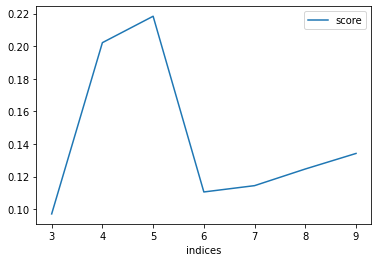

In [63]:
# gca stands for 'get current axis'
ax = plt.gca()

ind_sco_df.plot(kind='line',x='indices',y='score',ax=ax)

### Let's pick 5 clusters

In [64]:
best_cluster_num = 5

### Run k-means clustering using 'best_cluster_num' cluster's

In [65]:
kmeans = KMeans(n_clusters=best_cluster_num, init = 'k-means++', random_state = 37)
kmeans.fit_predict(st_zagreb_onehot_grouped)
# add clustering labels to neighborhoods_venues_sorted
neighborhoods_venues_sorted['Cluster Labels'] = kmeans.labels_
neighborhoods_venues_sorted

Town             Neighborhood     1st Most Common Venue  \
0    Split               GK BAČVICE                      Café   
1    Split        GK BLATINE ŠKRAPE                      Café   
2    Split                   GK BOL                     Hotel   
3    Split                  GK BRDA             Grocery Store   
4    Split                  GK GRAD  Mediterranean Restaurant   
5    Split                 GK GRIPE                      Café   
6    Split                  GK KMAN                     Hotel   
7    Split               GK KOCUNAR                      Café   
8    Split                 GK LOKVE                      Café   
9    Split                GK LOVRET  Mediterranean Restaurant   
10   Split           GK LUČAC MANUŠ  Mediterranean Restaurant   
11   Split                GK MEJAŠI      Fast Food Restaurant   
12   Split                  GK MEJE  Mediterranean Restaurant   
13   Split              GK MERTOJAK                      Café   
14   Split            GK NESLANOVAC             Grocery Store   
15   Split               GK PLOKITE                     Hotel   
16   Split               GK PUJANKE             Grocery Store   
17   Split           GK RAVNE NJIVE             Big Box Store   
18   Split              GK SIROBUJA        Italian Restaurant   
19   Split                GK SPINUT                Restaurant   
20   Split               GK SPLIT 3                       Bar   
21   Split               GK SUĆIDAR                       Bar   
22   Split              GK TRSTENIK                       Bar   
23   Split                 GK VAROŠ  Mediterranean Restaurant   
24   Split               GK VISOKA       Fast Food Restaurant   
25   Split                  GK ŠINE                     Beach   
26   Split                 GK ŽNJAN             Grocery Store   
27  Zagreb                Brezovica                   Stables   
28  Zagreb            Donja Dubrava         Electronics Store   
29  Zagreb               Donji grad                      Café   
30  Zagreb           Gornja Dubrava                      Café   
31  Zagreb  Gornji grad - Medveščak        Light Rail Station   
32  Zagreb                    Kruge                      Café   
33  Zagreb                 Maksimir                Restaurant   
34  Zagreb      Novi Zagreb - istok                    Bakery   
35  Zagreb      Novi Zagreb - zapad                      Café   
36  Zagreb      Peščenica - Žitnjak                      Café   
37  Zagreb                Podsljeme                     Trail   
38  Zagreb        Podsused - Vrapče                      Café   
39  Zagreb                  Sesvete                      Café   
40  Zagreb                Stenjevec                      Café   
41  Zagreb         Trešnjevka - jug                      Café   
42  Zagreb      Trešnjevka - sjever                       Bar   
43  Zagreb                Črnomerec                      Café   

          2nd Most Common Venue     3rd Most Common Venue  \
0                           Bar  Mediterranean Restaurant   
1                           Bar                Restaurant   
2                        Hostel             Grocery Store   
3                 Big Box Store                 Cafeteria   
4                 Boat or Ferry                Restaurant   
5                     Nightclub      Fast Food Restaurant   
6          Fast Food Restaurant                      Café   
7                           Bar             Grocery Store   
8                           Bar               Coffee Shop   
9                    Restaurant             Grocery Store   
10                         Café                       Bar   
11               Clothing Store             Grocery Store   
12                   Restaurant                     Hotel   
13         Fast Food Restaurant                       Bar   
14                          Bar         Electronics Store   
15                         Café      Fast Food Restaurant   
16            Electronics Store            

### Merge dataframes to add latitude and longitude for each neighborhood

In [66]:
df_merged = full_towns_df.merge(neighborhoods_venues_sorted, on=['Town', 'Neighborhood'])
df_merged

Neighborhood    Town   latitude  longitude  \
0                Donji grad  Zagreb  45.809878  15.977081   
1   Gornji grad - Medveščak  Zagreb  45.839926  15.975096   
2                     Kruge  Zagreb  45.797630  15.988700   
3                  Maksimir  Zagreb  45.833312  16.010151   
4       Peščenica - Žitnjak  Zagreb  45.812034  16.008027   
5       Novi Zagreb - istok  Zagreb  45.759520  16.007969   
6       Novi Zagreb - zapad  Zagreb  45.776532  15.972081   
7       Trešnjevka - sjever  Zagreb  45.801108  15.938832   
8          Trešnjevka - jug  Zagreb  45.798288  15.947751   
9                 Črnomerec  Zagreb  45.818301  15.938581   
10           Gornja Dubrava  Zagreb  45.830290  16.043665   
11            Donja Dubrava  Zagreb  45.816409  16.069855   
12                Stenjevec  Zagreb  45.815391  15.887082   
13        Podsused - Vrapče  Zagreb  45.818406  15.841420   
14                Podsljeme  Zagreb  45.888748  15.984549   
15                  Sesvete  Zagreb  45.827605  16.108984   
16                Brezovica  Zagreb  45.727649  15.911798   
17               GK BAČVICE   Split  43.503720  16.449910   
18        GK BLATINE ŠKRAPE   Split  43.506350  16.459912   
19                   GK BOL   Split  43.512204  16.449302   
20                  GK BRDA   Split  43.523212  16.466332   
21                  GK GRAD   Split  43.508028  16.438180   
22                 GK GRIPE   Split  43.508042  16.453580   
23                  GK KMAN   Split  43.519505  16.454961   
24               GK KOCUNAR   Split  43.519219  16.465257   
25                 GK LOKVE   Split  43.510136  16.458023   
26                GK LOVRET   Split  43.514318  16.437930   
27           GK LUČAC MANUŠ   Split  43.506923  16.447698   
28                  GK MEJE   Split  43.504774  16.428016   
29                GK MEJAŠI   Split  43.517509  16.482567   
30              GK MERTOJAK   Split  43.508746  16.480214   
31            GK NESLANOVAC   Split  43.521584  16.474297   
32               GK PLOKITE   Split  43.515554  16.455609   
33               GK PUJANKE   Split  43.516156  16.473191   
34           GK RAVNE NJIVE   Split  43.520962  16.464976   
35              GK SIROBUJA   Split  43.505995  16.513706   
36                GK SPINUT   Split  43.512971  16.429533   
37               GK SPLIT 3   Split  43.510466  16.468661   
38               GK SUĆIDAR   Split  43.513754  16.467775   
39                  GK ŠINE   Split  43.507287  16.523303   
40              GK TRSTENIK   Split  43.507303  16.472339   
41                 GK VAROŠ   Split  43.509172  16.435229   
42               GK VISOKA    Split  43.510468  16.474535   
43                 GK ŽNJAN   Split  43.508112  16.484383   

       1st Most Common Venue        2nd Most Common Venue  \
0                       Café                        Plaza   
1         Light Rail Station  Eastern European Restaurant   
2                       Café                          Bar   
3                 Restaurant                Grocery Store   
4                       Café                   Restaurant   
5                     Bakery             Sushi Restaurant   
6                       Café                       Bakery   
7                        Bar                         Café   
8                       Café                          Bar   
9                       Café                  Supermarket   
10                      Café           Light Rail Station   
11         Electronics Store                Train Station   
12                      Café                  Pizza Place   
13                      Café                   Hookah Bar   
14                     Trail                         Café   
15                      Café               Cosmetics Shop   
16                   Stables                Historic Site   
17                      Café                          Bar   
18                      Café                          Bar   
19                     Hotel                     

In [70]:
def drow_cluster_map(address, df_town, best_cluster_num):
    # create map
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

    # set color scheme for the clusters    
    x = np.arange(best_cluster_num)
    ys = [i + x + (i*x)**2 for i in range(best_cluster_num)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster in zip(df_town['latitude'], df_town['longitude'], df_town['Neighborhood'], df_town['Cluster Labels']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_clusters)       
    return map_clusters

### Create map for Zagreb

In [71]:
df_town = df_merged[df_merged['Town'] == 'Zagreb'].copy()
address = 'Zagreb, Croatia'
map_clusters = drow_cluster_map(address, df_town, best_cluster_num)
map_clusters

### Create map for Split

In [72]:
df_town = df_merged[df_merged['Town'] == 'Split'].copy()
address = 'Split, Croatia'
map_clusters = drow_cluster_map(address, df_town, best_cluster_num)
map_clusters

# 4. Examining our clusters

### Cluster 1

In [73]:
df_merged.loc[df_merged['Cluster Labels'] == 0, :]

Neighborhood    Town   latitude  longitude  \
1  Gornji grad - Medveščak  Zagreb  45.839926  15.975096   

  1st Most Common Venue        2nd Most Common Venue 3rd Most Common Venue  \
1    Light Rail Station  Eastern European Restaurant                 Field   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1                   Pub     Electronics Store  Fast Food Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1        Farmers Market    Falafel Restaurant            Eye Doctor   

  10th Most Common Venue  Cluster Labels  
1                Exhibit               0

### Cluster 2

In [74]:
df_merged.loc[df_merged['Cluster Labels'] == 1, :]

Neighborhood    Town   latitude  longitude  \
0            Donji grad  Zagreb  45.809878  15.977081   
2                 Kruge  Zagreb  45.797630  15.988700   
4   Peščenica - Žitnjak  Zagreb  45.812034  16.008027   
5   Novi Zagreb - istok  Zagreb  45.759520  16.007969   
6   Novi Zagreb - zapad  Zagreb  45.776532  15.972081   
7   Trešnjevka - sjever  Zagreb  45.801108  15.938832   
8      Trešnjevka - jug  Zagreb  45.798288  15.947751   
9             Črnomerec  Zagreb  45.818301  15.938581   
10       Gornja Dubrava  Zagreb  45.830290  16.043665   
11        Donja Dubrava  Zagreb  45.816409  16.069855   
12            Stenjevec  Zagreb  45.815391  15.887082   
13    Podsused - Vrapče  Zagreb  45.818406  15.841420   
15              Sesvete  Zagreb  45.827605  16.108984   
16            Brezovica  Zagreb  45.727649  15.911798   
17           GK BAČVICE   Split  43.503720  16.449910   
18    GK BLATINE ŠKRAPE   Split  43.506350  16.459912   
19               GK BOL   Split  43.512204  16.449302   
21              GK GRAD   Split  43.508028  16.438180   
22             GK GRIPE   Split  43.508042  16.453580   
23              GK KMAN   Split  43.519505  16.454961   
25             GK LOKVE   Split  43.510136  16.458023   
26            GK LOVRET   Split  43.514318  16.437930   
27       GK LUČAC MANUŠ   Split  43.506923  16.447698   
28              GK MEJE   Split  43.504774  16.428016   
29            GK MEJAŠI   Split  43.517509  16.482567   
30          GK MERTOJAK   Split  43.508746  16.480214   
32           GK PLOKITE   Split  43.515554  16.455609   
36            GK SPINUT   Split  43.512971  16.429533   
37           GK SPLIT 3   Split  43.510466  16.468661   
38           GK SUĆIDAR   Split  43.513754  16.467775   
39              GK ŠINE   Split  43.507287  16.523303   
40          GK TRSTENIK   Split  43.507303  16.472339   
41             GK VAROŠ   Split  43.509172  16.435229   
42           GK VISOKA    Split  43.510468  16.474535   
43             GK ŽNJAN   Split  43.508112  16.484383   

       1st Most Common Venue 2nd Most Common Venue     3rd Most Common Venue  \
0                       Café                 Plaza                Restaurant   
2                       Café                   Bar              Concert Hall   
4                       Café            Restaurant                       Bar   
5                     Bakery      Sushi Restaurant                     Hotel   
6                       Café                Bakery                       Bar   
7                        Bar                  Café                    Bakery   
8                       Café                   Bar                    Bakery   
9                       Café           Supermarket             Grocery Store   
10                      Café    Light Rail Station                       Bar   
11         Electronics Store         Train Station               Supermarket   
12                      Café           Pizza Place             Grocery Store   
13                      Café            Hookah Bar                    Bakery   
15                      Café        Cosmetics Shop                 BBQ Joint   
16                   Stables         Historic Site         Food & Drink Shop   
17                      Café                   Bar  Mediterranean Restaurant   
18                      Café                   Bar                Restaurant   
19                     Hotel                Hostel             Grocery Store   
21  Mediterranean Restaurant         Boat or Ferry                Restaurant   
22                      Café             Nightclub      Fast Food Restaurant   
23                     Hotel  Fast Food Restaurant                      Café   
25                      Café                   Bar               Coffee Shop   
26  Mediterranean Restaurant            Restaurant             Grocery Store   
27  Mediterranean Restaurant                  Café                       Bar   
28  Mediterranean Restaurant          

### Cluster 3

In [75]:
df_merged.loc[df_merged['Cluster Labels'] == 2, :]

Neighborhood    Town   latitude  longitude 1st Most Common Venue  \
3         Maksimir  Zagreb  45.833312  16.010151            Restaurant   
20         GK BRDA   Split  43.523212  16.466332         Grocery Store   
24      GK KOCUNAR   Split  43.519219  16.465257                  Café   
31   GK NESLANOVAC   Split  43.521584  16.474297         Grocery Store   
33      GK PUJANKE   Split  43.516156  16.473191         Grocery Store   
34  GK RAVNE NJIVE   Split  43.520962  16.464976         Big Box Store   

   2nd Most Common Venue 3rd Most Common Venue     4th Most Common Venue  \
3          Grocery Store            Steakhouse               Bus Station   
20         Big Box Store             Cafeteria  Mediterranean Restaurant   
24                   Bar         Grocery Store             Big Box Store   
31                   Bar     Electronics Store             Big Box Store   
33     Electronics Store             Irish Pub              Dance Studio   
34             Cafeteria                  Café         Electronics Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
3                   Café    Falafel Restaurant            Eye Doctor   
20                  Café     Electronics Store                   Bar   
24           Bus Station             Cafeteria     Electronics Store   
31             Pet Store         Shopping Mall                Bakery   
33         Big Box Store           Bus Station                   Bar   
34                   Bar         Grocery Store         Women's Store   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
3                Exhibit           Escape Room      Electronics Store   
20         Women's Store        Farmers Market     Falafel Restaurant   
24         Women's Store            Eye Doctor   Fast Food Restaurant   
31      Toy / Game Store  Fast Food Restaurant                   Café   
33                   Gym        Farmers Market     Falafel Restaurant   
34               Exhibit  Fast Food Restaurant         Farmers Market   

    Cluster Labels  
3                2  
20               2  
24               2  
31               2  
33               2  
34               2

### Cluster 4

In [76]:
df_merged.loc[df_merged['Cluster Labels'] == 3, :]

Neighborhood   Town   latitude  longitude 1st Most Common Venue  \
35  GK SIROBUJA  Split  43.505995  16.513706    Italian Restaurant   

   2nd Most Common Venue     3rd Most Common Venue 4th Most Common Venue  \
35           Pizza Place  Mediterranean Restaurant         Grocery Store   

   5th Most Common Venue        6th Most Common Venue 7th Most Common Venue  \
35         Women's Store  Eastern European Restaurant        Farmers Market   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
35    Falafel Restaurant            Eye Doctor                Exhibit   

    Cluster Labels  
35               3

### Cluster 5

In [77]:
df_merged.loc[df_merged['Cluster Labels'] == 4, :]

Neighborhood    Town   latitude  longitude 1st Most Common Venue  \
14    Podsljeme  Zagreb  45.888748  15.984549                 Trail   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
14                  Café         Women's Store        Farmers Market   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
14    Falafel Restaurant            Eye Doctor               Exhibit   

   8th Most Common Venue 9th Most Common Venue       10th Most Common Venue  \
14           Escape Room     Electronics Store  Eastern European Restaurant   

    Cluster Labels  
14               4

# 5. Conclusion

Clusters '1' and '5' represent neighborhoods that are unique to Zagreb, with each cluster containing only one neighborhood. The same can be said for cluster '4', except that it contains a neighborhood of Split.  
Neighborhoods in clusters '1' and '5' lie furthest on the north of Zagreb. In cluster '1', the most common venues fall in the category of 'Light Rail Station', and in cluster '5', in the 'Trail' category. 'Podsljeme' neighborhood, from cluster '5' is a part of Zagreb with family houses, green areas, but with not much social activities going on.  
Neighborhood 'Sirobuja' from cluster '4' is on the outer ring of Split.
Cluster '3' represent mostly neighborhoods of Split, with the exception of one neighborhood of Zagreb, 'Maksimir'. Those neighborhoods of Split are part of an industrial area, so it's no wonder that some of the most common venues there are categorized as stores, etc.  
It's obvious that there is a major overlapping of neighborhoods of Split and Zagreb in cluster '2'. Of all the neighborhoods in both towns, more than half of them belong to this cluster. In Split, we can see different types of neighborhoods as we go from the centar of the town (and its famous Roman palace that is usually crowded with tourists) further to north and east. Neighborhoods in cluster '2' contain cafés, restaurants, bar's, etc. In Split, those are areas with lots of tourists, and in Zagreb, those are neighborhoods where lots of people work and socialize.